In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
pd.set_option("display.precision", 2)
df = pd.read_csv("sample_data/adult_train.csv")
df.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.columns


Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num',
       'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Country', 'Target'],
      dtype='object')

In [ ]:
df.shape


(32561, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe()


,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
count,32561.00,3.26e+04,32561.00,32561.00,32561.00,32561.00
mean,38.58,1.90e+05,10.08,1077.65,87.30,40.44
std,13.64,1.06e+05,2.57,7385.29,402.96,12.35
min,17.00,1.23e+04,1.00,0.00,0.00,1.00
25%,28.00,1.18e+05,9.00,0.00,0.00,40.00
50%,37.00,1.78e+05,10.00,0.00,0.00,40.00
75%,48.00,2.37e+05,12.00,0.00,0.00,45.00
max,90.00,1.48e+06,16.00,99999.00,4356.00,99.00


In [ ]:
df.isnull().sum()
df = df.dropna()     #drop all rows that have any NaN values
df.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education_Num     0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_week    0
Country           0
Target            0
dtype: int64

In [ ]:

#df[df.duplicated(keep='first')]


,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
21490,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K


<function matplotlib.pyplot.show(close=None, block=None)>

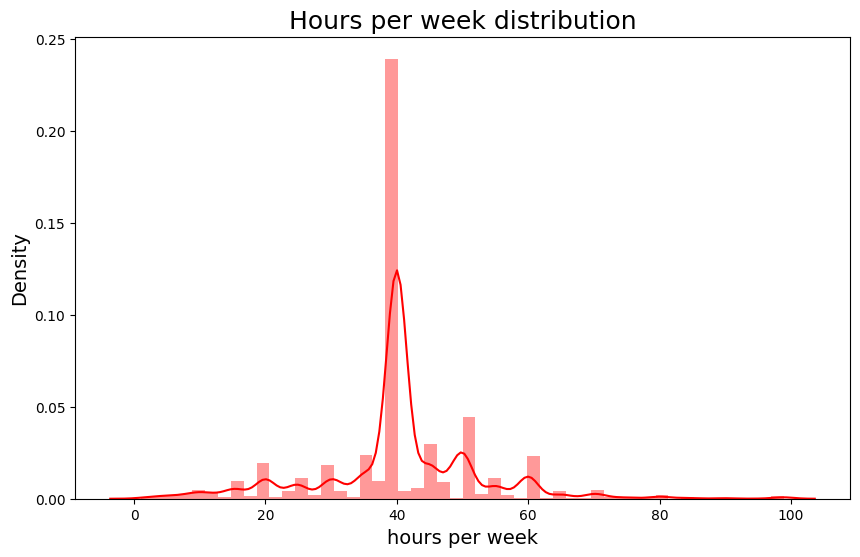

In [4]:
plt.figure(figsize=(10,6))
sns.distplot(df.Hours_per_week,color='r')
plt.title('Hours per week distribution', size=18)
plt.xlabel('hours per week',size=14)
plt.ylabel('Density',size=14)
plt.show

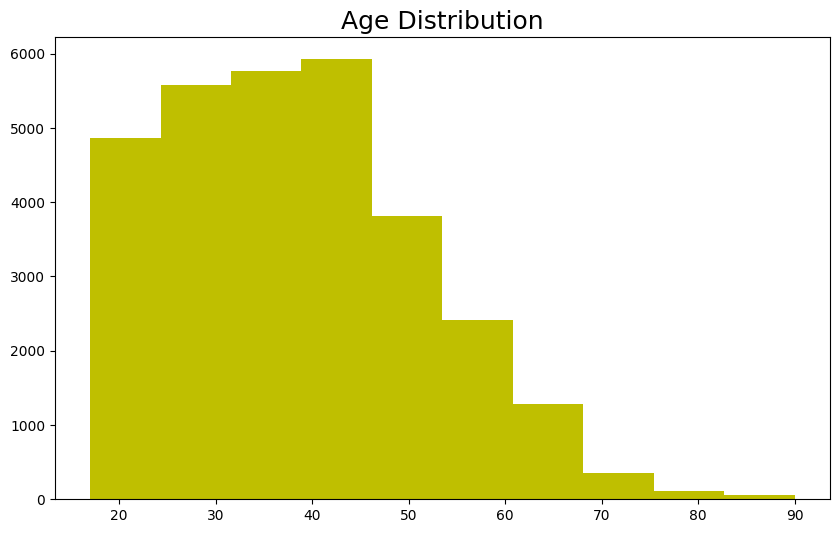

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df.Age,color='y')
plt.title('Age Distribution', size=18)
plt.show()

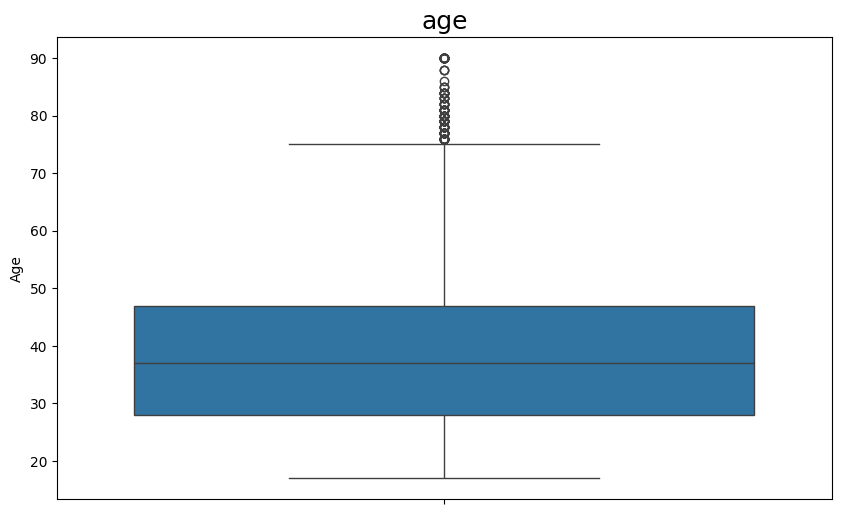

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(df.Age)
plt.title('age', size=18)
plt.show()

In [ ]:
# calculate the inter quantile range
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

19.0


In [ ]:
df[(df['Age']<Q1- 1.5 * IQR) |(df['Age']> Q3 + 1.5 * IQR)]

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
74,79,Private,124744,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,20,United-States,<=50K
100,76,Private,124191,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
222,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
316,77,Self-emp-not-inc,138714,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
324,76,Self-emp-not-inc,174309,Masters,14,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31814,80,Self-emp-not-inc,26865,7th-8th,4,Never-married,Farming-fishing,Unmarried,White,Male,0,0,20,United-States,<=50K
31855,82,Self-emp-not-inc,71438,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,20,United-States,<=50K
32277,90,Private,313749,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K
32367,90,Local-gov,214594,7th-8th,4,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,<=50K


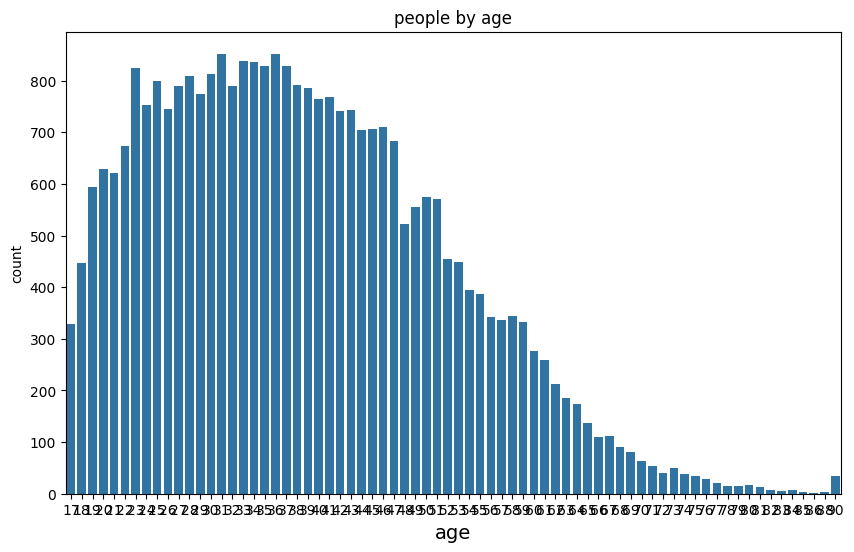

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Age', data = df)
plt.title('people by age')
plt.xlabel('age',size=14)
plt.show()

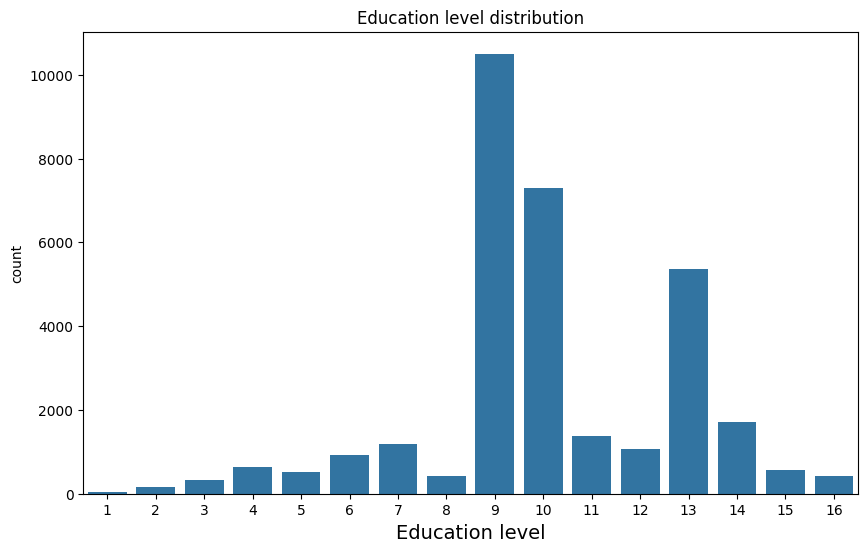

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(x='Education_Num', data = df)
plt.title('Education level distribution')
plt.xlabel('Education level',size=14)
plt.show()

In [ ]:
df.Age.value_counts()

Age
36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: count, Length: 72, dtype: int64

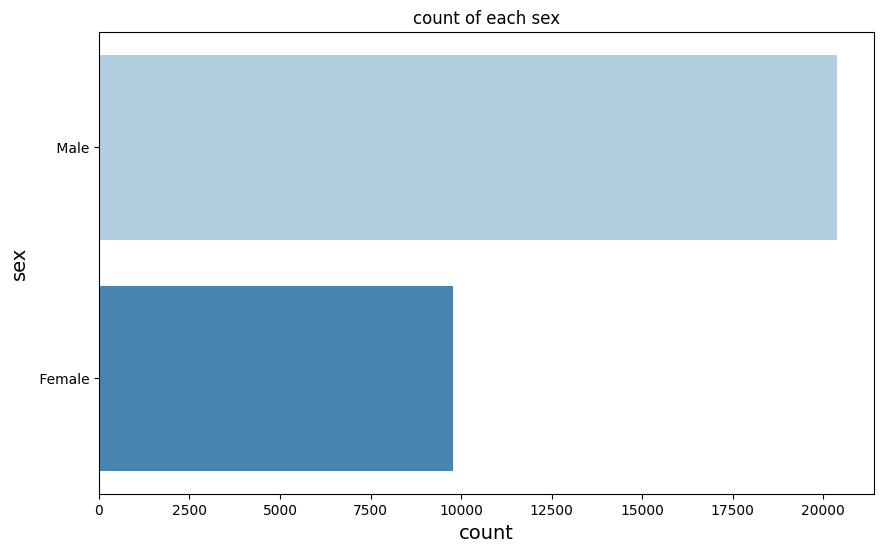

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df.Sex, palette='Blues')
plt.title('count of each sex')
plt.xlabel('count',size=14)
plt.ylabel('sex',size=14)
plt.show()

Text(0.5, 1.0, 'sex vs education level')

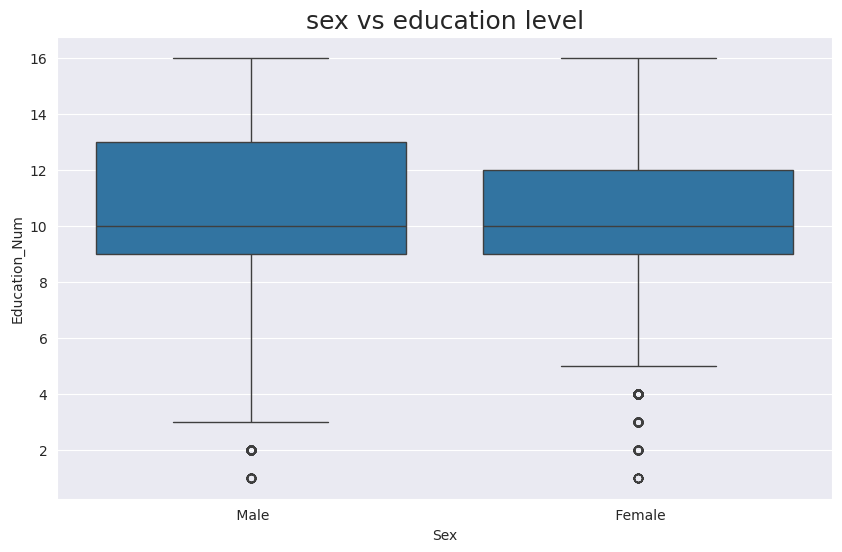

In [ ]:
plt.figure(figsize = (10, 6))
sns.set_style('darkgrid')
sns.boxplot(x='Sex',y='Education_Num',data=df)
plt.title('sex vs education level',size = 18)

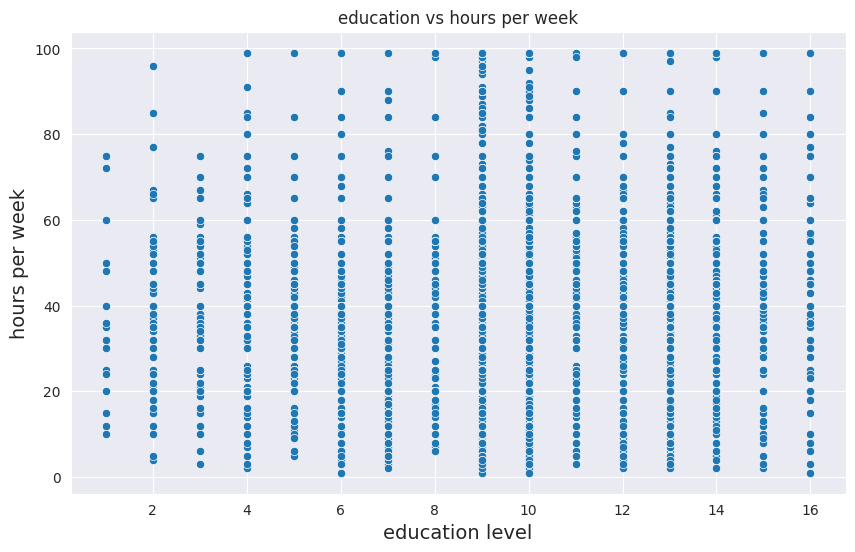

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Education_Num',y='Hours_per_week',data=df)
plt.title('education vs hours per week')
plt.xlabel('education level',size=14)
plt.ylabel('hours per week',size=14)
plt.show()

In [ ]:
new_df = df[['Age','Education_Num','Capital_Gain','Capital_Loss','Hours_per_week']].copy()
print('corelation between hours/per week and education is:{}'.format(round(new_df.corr()['Hours_per_week']['Education_Num'],3)) )

corelation between hours/per week and education is:0.153


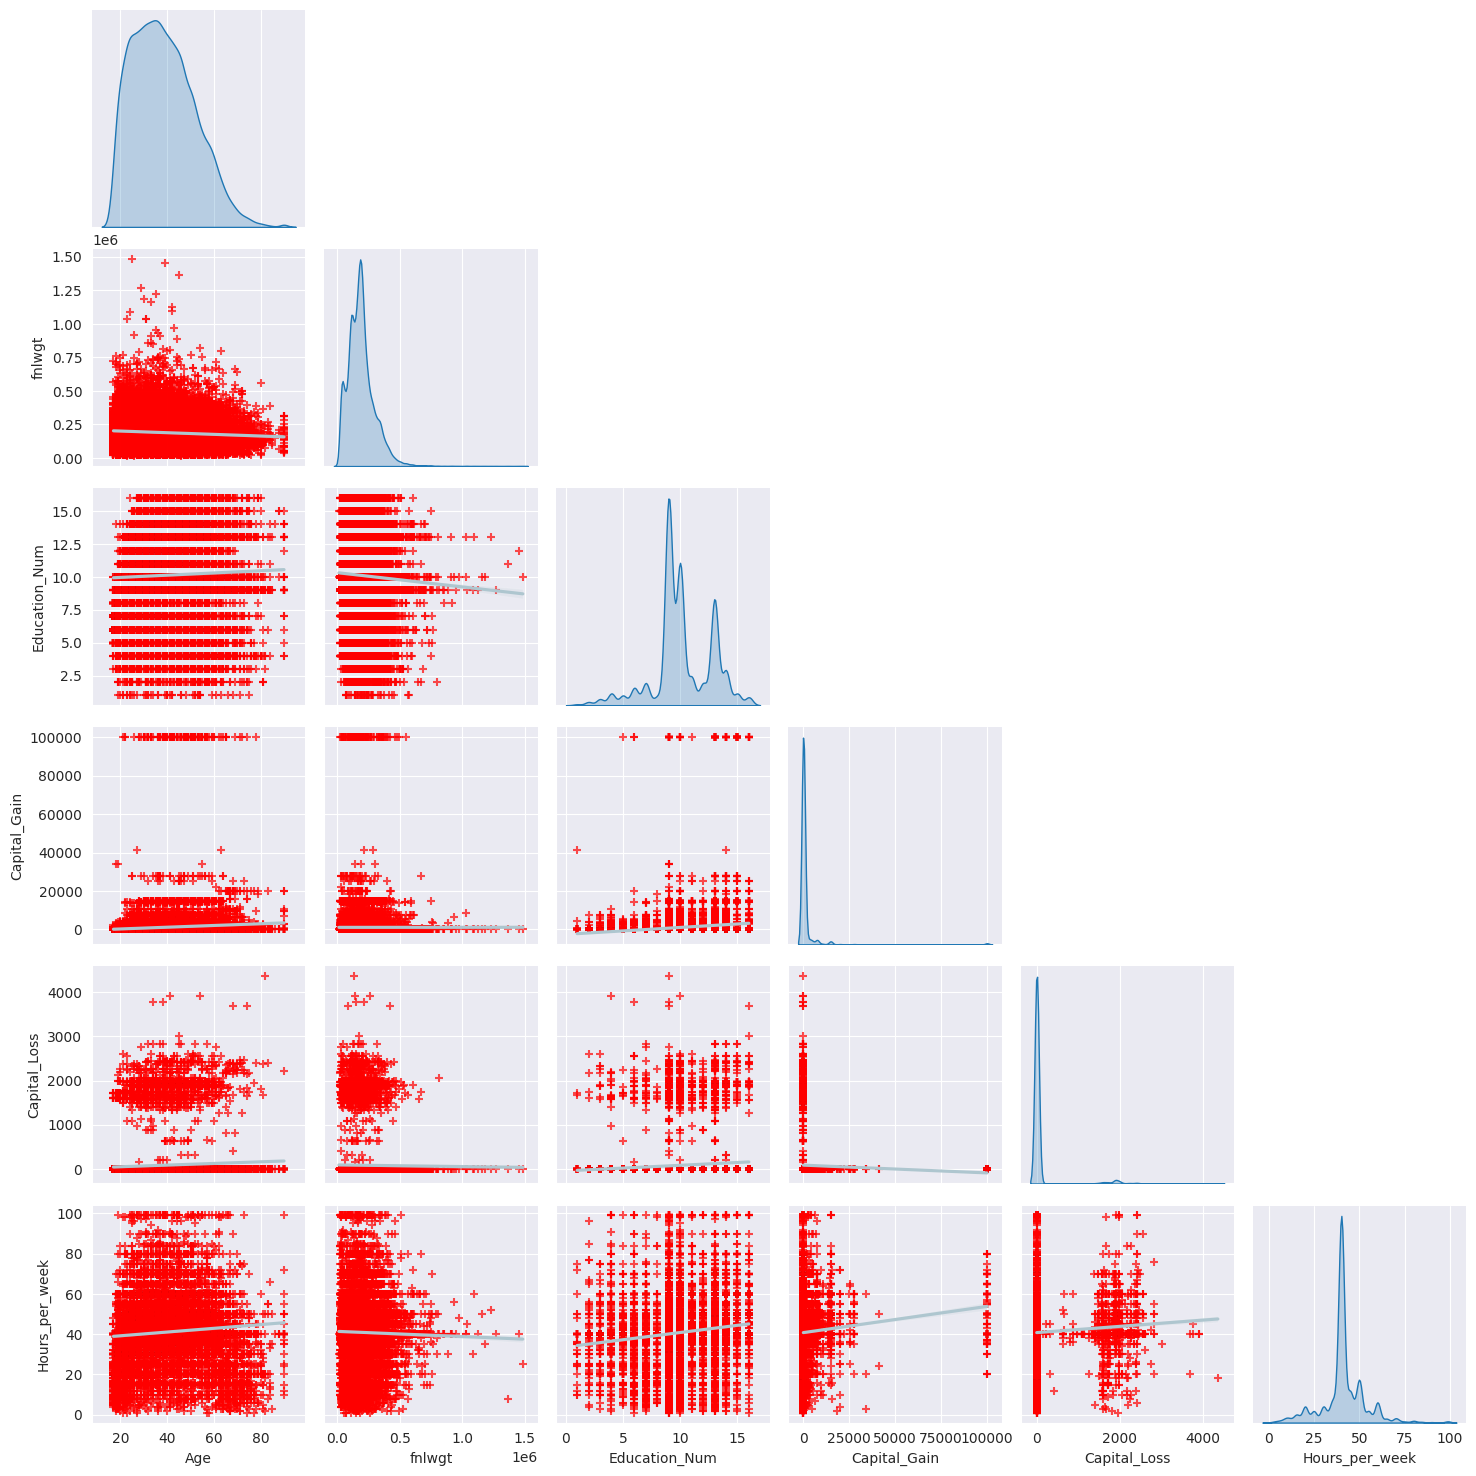

In [ ]:
sns.pairplot(df,
             markers="+",
             diag_kind="kde",
             kind='reg',
             plot_kws={'line_kws':{'color':'#aec6cf'},
                       'scatter_kws':{'alpha':0.7,
                                      'color':'red'}},
             corner=True);

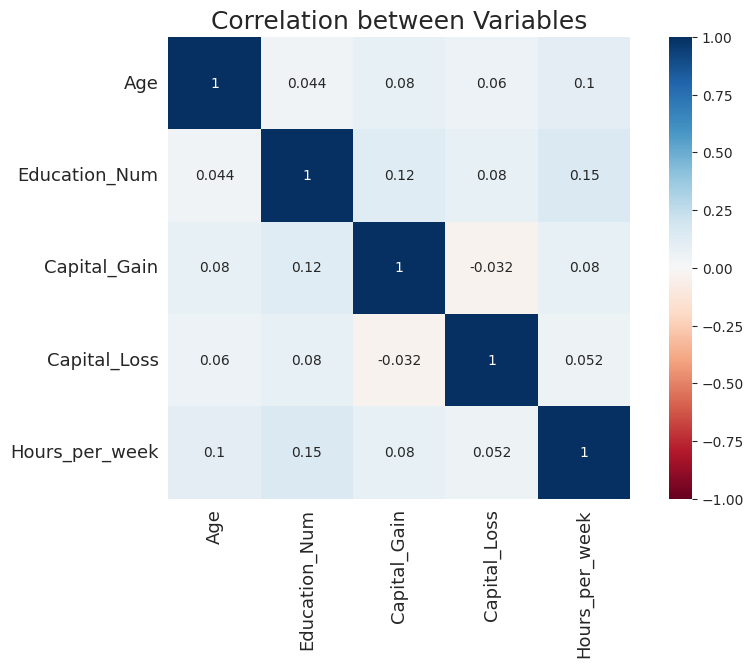

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(new_df.corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlation between Variables', size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()